In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
import ast

# Análise Inicial

In [9]:
df = pd.read_csv('tela_quente/datasets/tqcentury2.csv')
df

,date,title,comments,id,english_title,release_date,vote_average,cast
0,2022-02-07,Segurança em Risco,NaN,460846.0,Security,2017-03-04,6.257,"['Antonio Banderas', 'Ben Kingsley', 'Liam McI..."
1,2023-06-19,Pureza,inédito em TV aberta,651907.0,Pureza,2022-05-19,7.400,"['Dira Paes', 'Matheus Abreu', 'Mariana Nunes']"
2,2022-01-31,O Túnel,2019,606154.0,The Tunnel,2019-12-25,6.303,"['Thorbjørn Harr', 'Ylva Fuglerud', 'Mikkel Br..."
3,2022-02-14,A Garota no Trem,inédito na Globo; ex-Band,346685.0,The Girl on the Train,2016-10-05,6.437,"['Emily Blunt', 'Rebecca Ferguson', 'Haley Ben..."
4,2023-06-12,Meu Ex é um Espião,NaN,454992.0,The Spy Who Dumped Me,2018-08-02,6.405,"['Mila Kunis', 'Kate McKinnon', 'Justin Theroux']"
...,...,...,...,...,...,...,...,...
1674,1988-10-17,Porky's,inédito em TV aberta,10246.0,Porky's,1981-11-13,6.398,"['Dan Monahan', 'Mark Herrier', 'Wyatt Knight']"
1675,1988-11-14,Os Caça-Fantasmas,1984,620.0,Ghostbusters,1984-06-08,7.464,"['Bill Murray', 'Dan Aykroyd', 'Sigourney Weav..."
1676,1988-10-03,Vestida Para Matar,inédito em TV aberta,11033.0,Dressed to Kill,1980-07-25,6.940,"['Nancy Allen', 'Michael Caine', 'Keith Gordon']"
1677,1988-12-19,007: Os Diamantes São Eternos,inédito em TV aberta / Tela Quente Especial,681.0,Diamonds Are Forever,1971-12-14,6.400,"['Sean Connery', 'Jill St. John', 'Charles Gray']"


In [10]:
df.dropna(subset=['title'], inplace=True)
df.dropna(subset=['english_title'], inplace=True)
df

,date,title,comments,id,english_title,release_date,vote_average,cast
0,2022-02-07,Segurança em Risco,NaN,460846.0,Security,2017-03-04,6.257,"['Antonio Banderas', 'Ben Kingsley', 'Liam McI..."
1,2023-06-19,Pureza,inédito em TV aberta,651907.0,Pureza,2022-05-19,7.400,"['Dira Paes', 'Matheus Abreu', 'Mariana Nunes']"
2,2022-01-31,O Túnel,2019,606154.0,The Tunnel,2019-12-25,6.303,"['Thorbjørn Harr', 'Ylva Fuglerud', 'Mikkel Br..."
3,2022-02-14,A Garota no Trem,inédito na Globo; ex-Band,346685.0,The Girl on the Train,2016-10-05,6.437,"['Emily Blunt', 'Rebecca Ferguson', 'Haley Ben..."
4,2023-06-12,Meu Ex é um Espião,NaN,454992.0,The Spy Who Dumped Me,2018-08-02,6.405,"['Mila Kunis', 'Kate McKinnon', 'Justin Theroux']"
...,...,...,...,...,...,...,...,...
1674,1988-10-17,Porky's,inédito em TV aberta,10246.0,Porky's,1981-11-13,6.398,"['Dan Monahan', 'Mark Herrier', 'Wyatt Knight']"
1675,1988-11-14,Os Caça-Fantasmas,1984,620.0,Ghostbusters,1984-06-08,7.464,"['Bill Murray', 'Dan Aykroyd', 'Sigourney Weav..."
1676,1988-10-03,Vestida Para Matar,inédito em TV aberta,11033.0,Dressed to Kill,1980-07-25,6.940,"['Nancy Allen', 'Michael Caine', 'Keith Gordon']"
1677,1988-12-19,007: Os Diamantes São Eternos,inédito em TV aberta / Tela Quente Especial,681.0,Diamonds Are Forever,1971-12-14,6.400,"['Sean Connery', 'Jill St. John', 'Charles Gray']"


In [11]:
df['release_year'] = df['release_date'].str[:4].astype(float)
df['year'] = df['date'].str[:4].astype(float)

df['diff'] = df['year'] - df['release_year']

In [12]:
rows_to_delete = df.loc[df['diff'] < 0]
df.drop(rows_to_delete.index, inplace=True)

In [13]:
df.dropna(subset=['release_date'], inplace = True)
df

,date,title,comments,id,english_title,release_date,vote_average,cast,release_year,year,diff
0,2022-02-07,Segurança em Risco,NaN,460846.0,Security,2017-03-04,6.257,"['Antonio Banderas', 'Ben Kingsley', 'Liam McI...",2017.0,2022.0,5.0
1,2023-06-19,Pureza,inédito em TV aberta,651907.0,Pureza,2022-05-19,7.400,"['Dira Paes', 'Matheus Abreu', 'Mariana Nunes']",2022.0,2023.0,1.0
2,2022-01-31,O Túnel,2019,606154.0,The Tunnel,2019-12-25,6.303,"['Thorbjørn Harr', 'Ylva Fuglerud', 'Mikkel Br...",2019.0,2022.0,3.0
3,2022-02-14,A Garota no Trem,inédito na Globo; ex-Band,346685.0,The Girl on the Train,2016-10-05,6.437,"['Emily Blunt', 'Rebecca Ferguson', 'Haley Ben...",2016.0,2022.0,6.0
4,2023-06-12,Meu Ex é um Espião,NaN,454992.0,The Spy Who Dumped Me,2018-08-02,6.405,"['Mila Kunis', 'Kate McKinnon', 'Justin Theroux']",2018.0,2023.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1674,1988-10-17,Porky's,inédito em TV aberta,10246.0,Porky's,1981-11-13,6.398,"['Dan Monahan', 'Mark Herrier', 'Wyatt Knight']",1981.0,1988.0,7.0
1675,1988-11-14,Os Caça-Fantasmas,1984,620.0,Ghostbusters,1984-06-08,7.464,"['Bill Murray', 'Dan Aykroyd', 'Sigourney Weav...",1984.0,1988.0,4.0
1676,1988-10-03,Vestida Para Matar,inédito em TV aberta,11033.0,Dressed to Kill,1980-07-25,6.940,"['Nancy Allen', 'Michael Caine', 'Keith Gordon']",1980.0,1988.0,8.0
1677,1988-12-19,007: Os Diamantes São Eternos,inédito em TV aberta / Tela Quente Especial,681.0,Diamonds Are Forever,1971-12-14,6.400,"['Sean Connery', 'Jill St. John', 'Charles Gray']",1971.0,1988.0,17.0


In [14]:
df.head(3)

,date,title,comments,id,english_title,release_date,vote_average,cast,release_year,year,diff
0,2022-02-07,Segurança em Risco,NaN,460846.0,Security,2017-03-04,6.257,"['Antonio Banderas', 'Ben Kingsley', 'Liam McI...",2017.0,2022.0,5.0
1,2023-06-19,Pureza,inédito em TV aberta,651907.0,Pureza,2022-05-19,7.400,"['Dira Paes', 'Matheus Abreu', 'Mariana Nunes']",2022.0,2023.0,1.0
2,2022-01-31,O Túnel,2019,606154.0,The Tunnel,2019-12-25,6.303,"['Thorbjørn Harr', 'Ylva Fuglerud', 'Mikkel Br...",2019.0,2022.0,3.0


In [15]:
df.describe()

,id,vote_average,release_year,year,diff
count,1.433000e+03,1433.000000,1433.00000,1433.000000,1433.000000
mean,1.009837e+05,6.143341,2000.54850,2005.686671,5.138172
std,1.668060e+05,1.284352,12.94846,10.292860,6.986052
min,1.200000e+01,0.000000,1937.00000,1988.000000,0.000000
25%,9.103000e+03,5.690000,1991.00000,1996.000000,3.000000
50%,1.436700e+04,6.245000,2002.00000,2006.000000,3.000000
75%,1.194500e+05,6.829000,2011.00000,2015.000000,4.000000
max,1.080845e+06,10.000000,2023.00000,2023.000000,56.000000


In [16]:
df.dropna(subset=['cast'], inplace=True) 
df['cast'] = df['cast'].apply(ast.literal_eval)

In [17]:
lista_final = sum(df['cast'], [])
# print(type(lista_final), lista_final)


Counter(lista_final).most_common(10)

[('Tom Cruise', 22),
 ('Eddie Murphy', 21),
 ('Arnold Schwarzenegger', 20),
 ('Dwayne Johnson', 19),
 ('Samuel L. Jackson', 18),
 ('Jean-Claude Van Damme', 18),
 ('Jason Statham', 17),
 ('Cameron Diaz', 17),
 ('Antonio Banderas', 16),
 ('Robert Downey Jr.', 15)]

### Utilizando os 5 principais atores nos créditos, o top 10 de atores mais comuns na sessão da tarde é:

- Renato Aragão, 135
- Dedé Santana, 123
- Eddie Murphy, 122
- Whoopi Goldberg, 103
- Mussum, 98
- Adam Sandler, 88
- Jackie Chan, 85
- Danny DeVito, 77
- Zacarias, 76
- Anne Hathaway, 74

### Utilizando todos os disponíveis, o top 10 é:

[('Frank Welker', 223),
 ('Renato Aragão', 135),
 ('Dedé Santana', 123),
 ('Eddie Murphy', 122),
 ('Whoopi Goldberg', 118),
 ('Rob Schneider', 109),
 ('Adam Sandler', 104),
 ('Danny DeVito', 102),
 ('Mussum', 98),
 ('Phil Proctor', 89)]

 ### Utilizando apenas o primeiro na ordem dos créditos:

 [('Renato Aragão', 135),
 ('Adam Sandler', 88),
 ('Jackie Chan', 76),
 ('Eddie Murphy', 73),
 ('Whoopi Goldberg', 67),
 ('Tom Hanks', 61),
 ('Martin Lawrence', 48),
 ('Arnold Schwarzenegger', 48),
 ('Michael J. Fox', 48),
 ('Will Smith', 45)]

In [18]:
Counter(df['release_year']).most_common(1) # Data de lançamento mais comum


[(2016.0, 66)]

In [20]:
df[df['diff'] < 2]['vote_average'].mean() # nota média de filmes lançamento

5.841461538461538

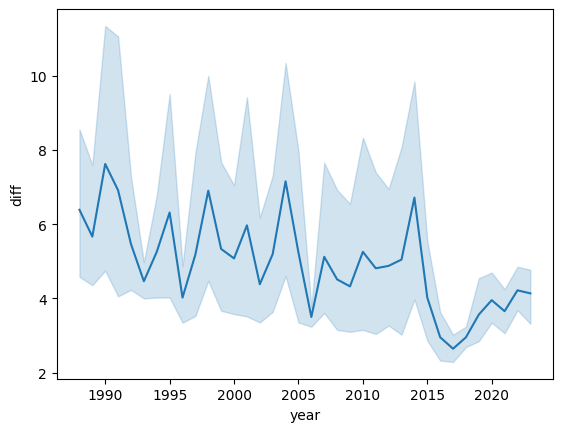

In [21]:
# Diferença lançamento-exibição por ano
sns.lineplot(data = df, y = 'diff', x = 'year')
plt.show()

            count      mean       std  min      25%     50%      75%    max
diff                                                                       
(0, 5]     1208.0  6.234460  0.921468  0.0  5.70175  6.2385  6.79625  8.703
(5, 10]      97.0  6.376474  1.058109  1.5  5.70800  6.3980  7.21400  8.144
(10, 25]     49.0  5.866653  2.506563  0.0  5.56900  6.5000  7.40200  9.500
(25, 50]     35.0  5.269229  2.785966  0.0  5.00000  6.4890  6.76600  8.360
(50, 100]     4.0  6.376750  1.575744  4.2  6.02775  6.6685  7.01750  7.970


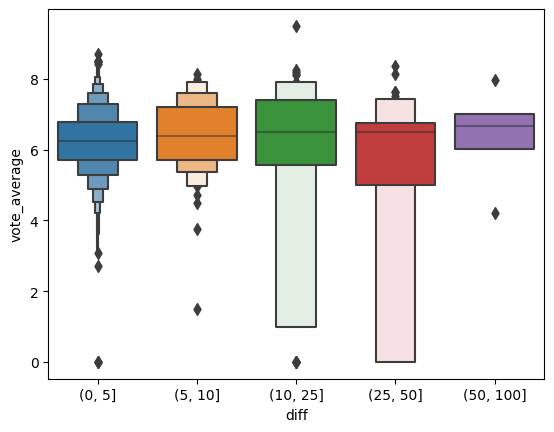

In [24]:
# Média de votos por categoria de diferença
diff_categorized = pd.cut(df['diff'], bins = [0, 5, 10, 25, 50, 100])

sns.boxenplot(x=diff_categorized, y=df['vote_average'])
print(df['vote_average'].groupby(diff_categorized).describe())
plt.show()

<Axes: xlabel='release_year', ylabel='vote_average'>

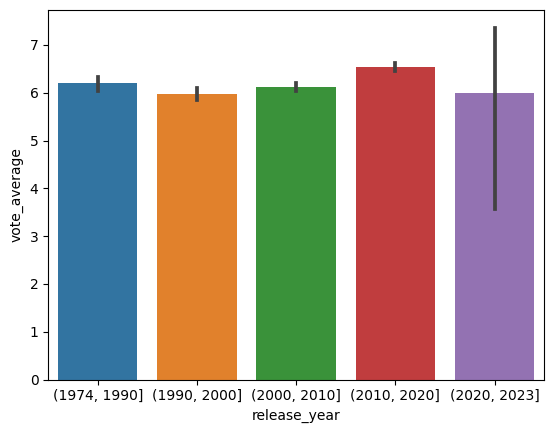

In [25]:
year_categorized = pd.cut(df['release_year'], bins = [1974, 1990, 2000, 2010, 2020, 2023])

sns.barplot(x=year_categorized, y=df['vote_average'])

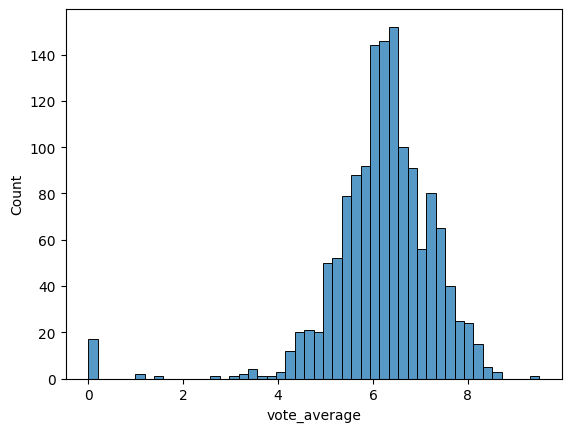

In [26]:
sns.histplot(df['vote_average'])
plt.show()


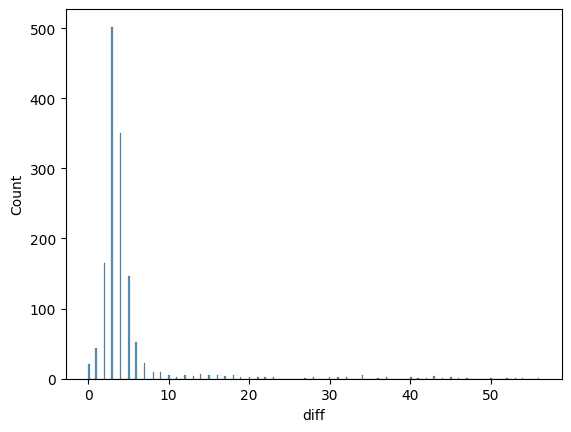

In [27]:
sns.histplot(df['diff'])
plt.show()

In [28]:
df['diff'].describe()

count    1414.000000
mean        4.933522
std         6.449529
min         0.000000
25%         3.000000
50%         3.000000
75%         4.000000
max        56.000000
Name: diff, dtype: float64

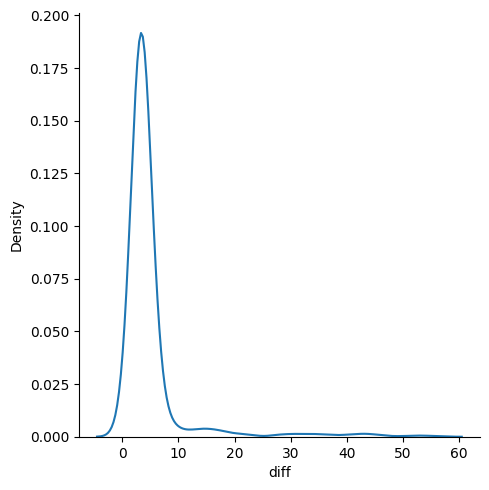

In [29]:
sns.displot(data = df, x = 'diff', kind = 'kde')
plt.show()

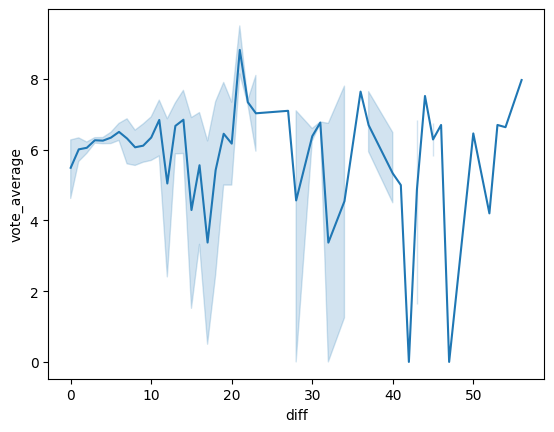

In [30]:
sns.lineplot(data = df, x = 'diff', y = 'vote_average')
plt.show()

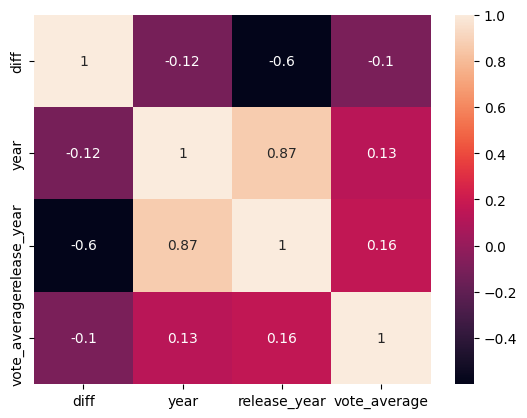

In [31]:
sns.heatmap(df[['diff', 'year', 'release_year', 'vote_average']].corr(), annot=True)
plt.show()

/home/erlo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


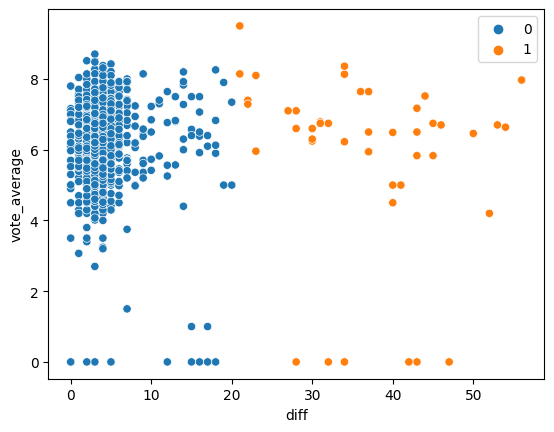

In [34]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df[['diff', 'vote_average']])
sns.scatterplot(x = 'diff', y = 'vote_average', data=df, hue = kmeans.labels_)
plt.show()

/home/erlo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/erlo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/erlo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/erlo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

<Axes: >

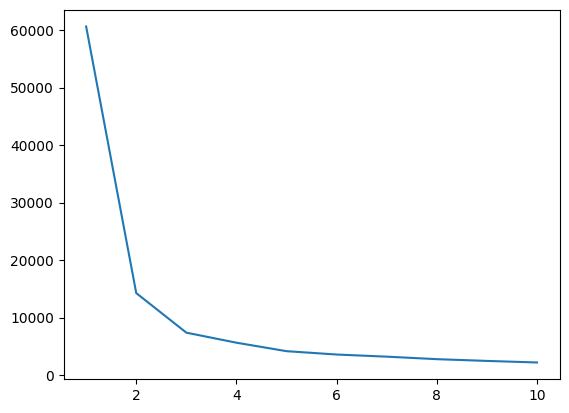

In [35]:
df_group = df[['diff', 'vote_average']]

inertias = []
for i in range(1,11):
	kmeans = KMeans(n_clusters=i)
	kmeans.fit(df_group)
	inertias.append(kmeans.inertia_)


inertias

sns.lineplot(x= range(1,11), y = inertias)

/home/erlo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


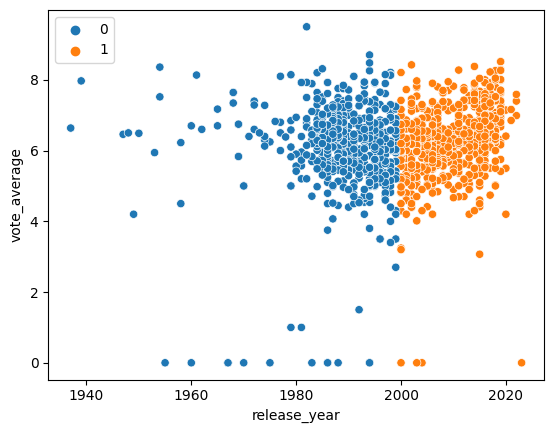

In [36]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df[['release_year', 'vote_average']])
sns.scatterplot(x = 'release_year', y = 'vote_average', data=df, hue = kmeans.labels_)
plt.show()

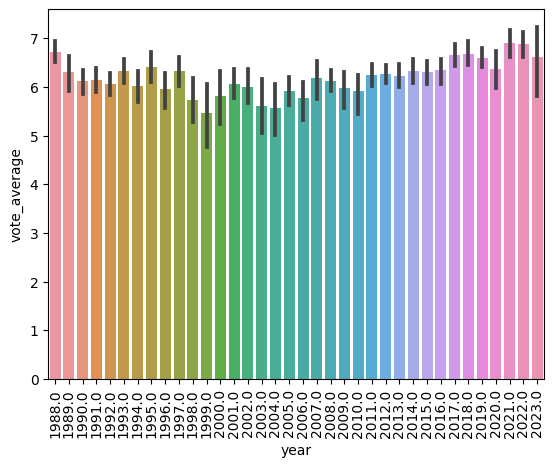

In [37]:
sns.barplot(x = 'year', y = 'vote_average', data=df)
plt.xticks(rotation=90)
plt.show()

# Tela Quente

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('tela_quente/datasets/tqcentury2.csv')
df.head(3)

,date,title,comments,id,english_title,release_date,vote_average,cast
0,2022-02-07,Segurança em Risco,NaN,460846.0,Security,2017-03-04,6.257,"['Antonio Banderas', 'Ben Kingsley', 'Liam McI..."
1,2023-06-19,Pureza,inédito em TV aberta,651907.0,Pureza,2022-05-19,7.400,"['Dira Paes', 'Matheus Abreu', 'Mariana Nunes']"
2,2022-01-31,O Túnel,2019,606154.0,The Tunnel,2019-12-25,6.303,"['Thorbjørn Harr', 'Ylva Fuglerud', 'Mikkel Br..."
